In [1]:
## Load Libraries
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load files
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,image_id,label
0,train_1a,rice
1,train_1b,candy
2,train_1c,jam
3,train_1d,coffee
4,train_2a,vinegar


The train data has 25 unique labels


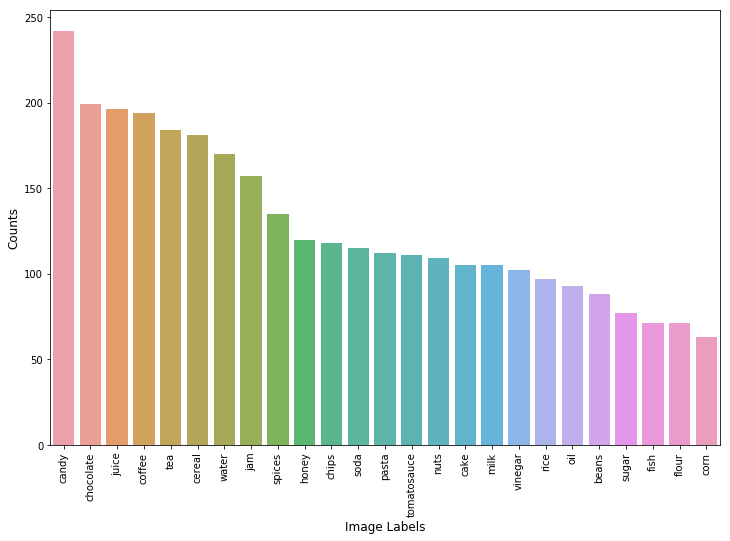

<class 'pandas.core.series.Series'>


In [4]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))
#Labels 
label_counts = train['label'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()
print(type(label_counts))

In [5]:
# set path to read train and test image
TRAIN_PATH = '../data/train_img/'
TEST_PATH = '../data/test_img/'

In [6]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #Image is loaded as BGR convert it to RGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64,64)) # you can resize to  (128,128) or (256,256)
    return img

In [7]:
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

100%|██████████| 1732/1732 [00:03<00:00, 441.93it/s]


In [8]:
#Now you have list of images
print(type(train_data))
#Convert them to numpy float arrays in passion(b,h,w,c) and normalize them too.
x_train = np.array(train_data, np.float32) / 255.
x_test = np.array(test_data, np.float32) / 255.
print(x_train.shape, x_test.shape)

<type 'list'>
((3215, 64, 64, 3), (1732, 64, 64, 3))


In [9]:
# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v for v,k in enumerate(set(label_list))}
print(type(Y_train))
categories = len(Y_train)
print('categories',categories)
print(Y_train)
y_train1 =np.array([Y_train[k] for k in label_list])
print(y_train1.shape)

<type 'dict'>
('categories', 25)
{'tea': 0, 'fish': 1, 'honey': 2, 'juice': 3, 'milk': 4, 'nuts': 5, 'sugar': 6, 'jam': 7, 'rice': 8, 'coffee': 9, 'oil': 10, 'flour': 11, 'corn': 12, 'chocolate': 13, 'water': 14, 'cereal': 15, 'pasta': 16, 'chips': 17, 'tomatosauce': 18, 'vinegar': 19, 'candy': 20, 'beans': 21, 'soda': 22, 'cake': 23, 'spices': 24}
(3215,)


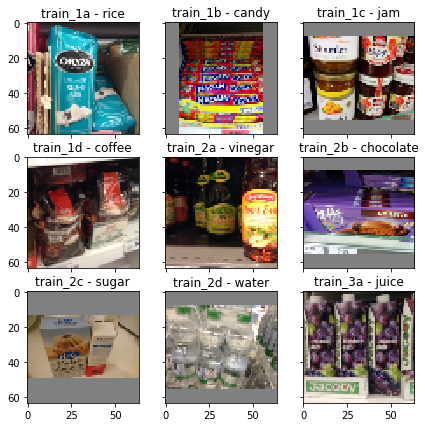

In [10]:


## just images doesn't help, lets see the images with their respective labels
plt.rc('axes', grid=False)

_, axs = plt.subplots(3,3, sharex = 'col', sharey='row', figsize = (7,7))
axs = axs.ravel()

# lets see first 8 images - you can increase i value to see more images
for i, (image_name, label) in enumerate(zip(train.image_id, train.label)):
    if i <= 8:
        img = read_image(TRAIN_PATH + image_name + '.png')
        axs[i].imshow(img)
        axs[i].set_title('{} - {}'.format(image_name, label))
    else:
        break



In [11]:
#convert to one-hot
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [12]:
y_train = one_hot(y_train1,categories)
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))

number of training examples = 3215
number of test examples = 1732
X_train shape: (3215, 64, 64, 3)
Y_train shape: (3215, 25)
X_test shape: (1732, 64, 64, 3)


In [13]:
import tensorflow as tf
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    # height, width, #channels, #y_categories
    X = tf.placeholder(tf.float32, shape=(None, n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32, shape=(None, n_y))    
    return X, Y